<a href="https://colab.research.google.com/github/andrade-adsf/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Paris

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo, por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). É possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui fora obtidos a partir do Inside Airbnb.

Para esta análise exploratória inicial o arquivo utilizado foi o seguinte:


*   `listings.csv` - *Summary information and metrics for listings in Paris (good for visualisations).*



In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-04-15/visualisations/listings.csv")

## Análise dos Dados

Nessa etapa iremos observar pela primeira vez os dados disponibilizados no *dataset*, afim de ter melhor entendimento de como estão estruturados.


In [0]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - informa o tipo de acomodação que é servida
* `price` - preço para alugar o imóvel 
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - numero de *reviews* que a propriedade possui
* `last_review` - data do último *review*
* `reviews_per_month` - quantidade de *reviews* por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.22,1,365
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,220,2020-03-22,1.67,1,86
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,119,10,268,2020-02-26,2.44,2,282
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,308
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.85899,2.34735,Entire home/apt,75,180,0,NaN,NaN,1,50


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em seguida visualizaremos quantas entradas e variáveis o *dataset* possui, além do tipo de dado de cada coluna.

O *dataset* utilizado é uma versão resumida dos dados do Airbnb de Paris. Na mesma fonte de onde esse foi baixado é possível baixar outra versão com dados mais completos.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 59322
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Chama a atenção o fato de 100% dos valores de `neighbourhood_group` estarem nulos. Além de cerca de 20% dos imóveis não terem tido review.

Como ponto positivo, apenas 0,1% e 0,01% dos valores de `name` e `host_name`, respectivamente, estão faltando.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.205876
last_review                       0.205876
name                              0.001045
host_name                         0.000169
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Por meio da visualização distorcida dos gráficos alguns dados chamam a atenção.

Aqui focaremos na análise das informações determinadas pelo anfitrião, portanto deixaremos de lado `calculated_host_listings_counts`, `number_of_reviews` e `reviews_per_month`.

Podemos verificar então uma discrepância nos dados fornecidos para `minimum_nights` e `price`.

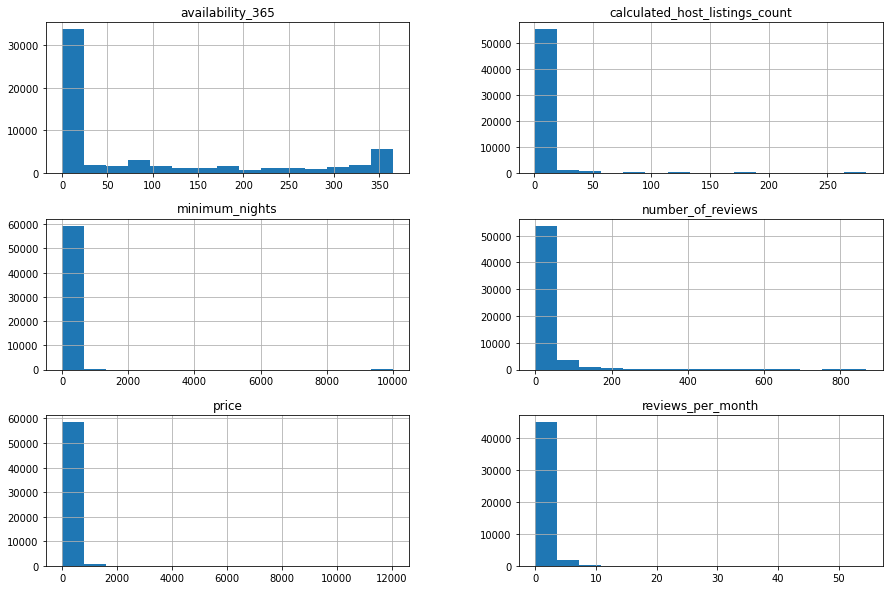

In [0]:
# plotar o histograma das variáveis numéricas
df[['availability_365', 'minimum_nights', 'number_of_reviews', 'price',
    'reviews_per_month', 'calculated_host_listings_count']].hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

O histograma aparenta mostrar que sim, iremos um pouco mais a fundo por meio de do método `describe()` e plotando `boxplots`.

In [0]:
# ver o resumo estatístico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,59322.0000,59322.000000,59322.000000,47109.000000,59322.000000,59322.000000
mean,132.7507,5.463487,20.964010,0.968355,8.148040,92.035788
std,332.7486,46.182731,42.969181,1.249269,32.227452,129.344539
min,0.0000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.0000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,85.0000,2.000000,6.000000,0.550000,1.000000,0.000000
75%,128.0000,4.000000,21.000000,1.270000,1.000000,173.000000
max,12039.0000,9999.000000,867.000000,54.450000,283.000000,365.000000


A partir do resumo estatístico podemos confirmar algumas hipóteses.

*   A variável `price` possui 75% do seu valor abaixo de 128, enquanto o seu valor máximo é de 12039.
*   O valor único máximo para `minimum_nights` é maior do que o limite de dias do ano (365).



#### Boxplot para `price`

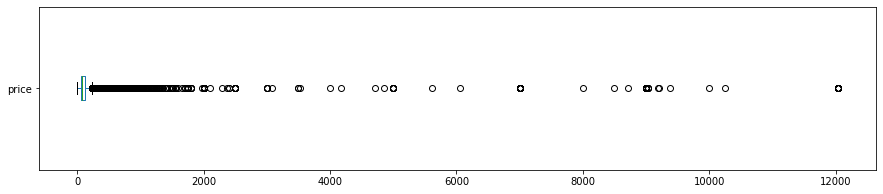


valores acima de 1200 correspondem a:
163 entradas
0.27%


In [0]:
# ver outliers de price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nvalores acima de 1200 correspondem a:")
print("{} entradas".format(len(df[df.price > 1200])))
print("{:.2f}%".format(len(df[df.price > 1200]) / df.shape[0]*100))

#### Boxplot para `minimum_nights`

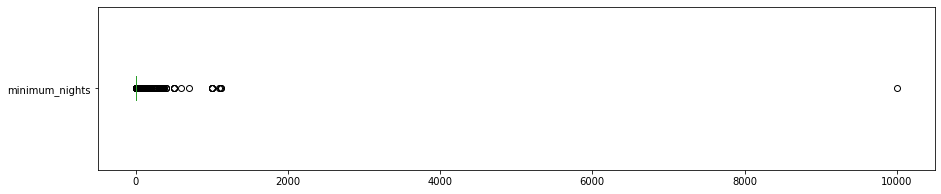


valores acima de 30 dias correspodem a:
877 entradas
1.48%


In [0]:
# ver outliers de minimum_nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias
print("\nvalores acima de 30 dias correspodem a:")
print("{} entradas".format(len(df[df['minimum_nights'] > 30])))
print("{:.2f}%".format(len(df[df['minimum_nights'] > 30]) / df.shape[0]*100))

#### Removendo *outliers*

Vamos limpar nosso *dataset* removendo os outliers identificados em `price` e `minimum_nights`, além da coluna `neighbourhood_group` que não possui nenhum valor válido.

In [0]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > 30].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#### Histogramas sem *outliers*


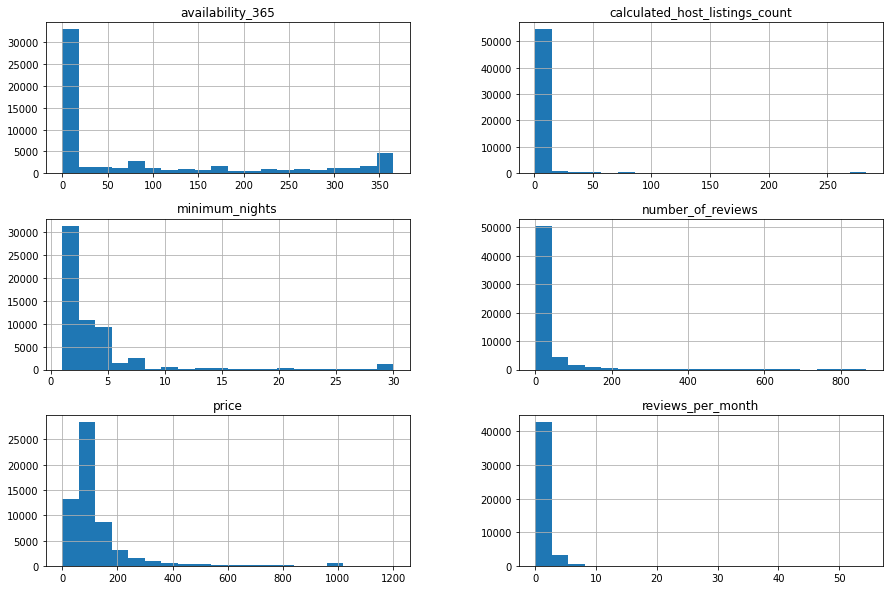

In [0]:
# plotar o histograma das variáveis numéricas
df_clean[['availability_365', 'minimum_nights', 'number_of_reviews', 'price',
    'reviews_per_month', 'calculated_host_listings_count']].hist(bins=20, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

Após remover os valores discrepantes calculamos a média do valor da aluguel e reparamos que agora esta muito mais próxima da mediana quando em comparação ao resumo estatístico acima.

In [0]:
# ver a média da coluna `price`
print("Média de preço do aluguel:\t {:.2f}".format((df_clean.price.sum() / df_clean.shape[0])))

Média de preço do aluguel:	 119.84


### **Q6. Qual a correlação existente entre as variáveis?**

Buscamos entender se existe relação ou semelhança entre duas variáveis. Para isso criamos uma matriz de correlação e a partir dela um heatmap utilizando a biblioteca `seaborn`.


In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.002248,-0.008846,0.049977,0.178801,0.290140
minimum_nights,0.002248,1.000000,-0.043790,-0.115460,0.047474,0.119442
number_of_reviews,-0.008846,-0.043790,1.000000,0.668025,-0.044135,0.230858
reviews_per_month,0.049977,-0.115460,0.668025,1.000000,0.010151,0.274840
calculated_host_listings_count,0.178801,0.047474,-0.044135,0.010151,1.000000,0.214558
availability_365,0.290140,0.119442,0.230858,0.274840,0.214558,1.000000


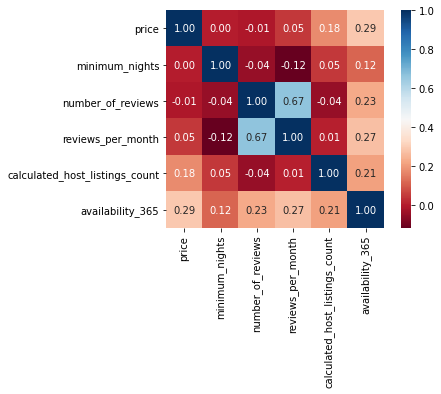

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    50345
Private room        6266
Hotel room          1279
Shared room          396
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / df.shape[0]

Entire home/apt    0.848673
Private room       0.105627
Hotel room         0.021560
Shared room        0.006675
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Vamos comparar a diferença de preço entre as localidades.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Élysée                 230.632005
Louvre                 185.757430
Luxembourg             179.229527
Palais-Bourbon         175.572335
Passy                  164.473724
Hôtel-de-Ville         159.127152
Temple                 153.064471
Opéra                  148.964632
Bourse                 148.664286
Panthéon               132.928079
Entrepôt               113.848580
Batignolles-Monceau    109.042989
Vaugirard              108.850900
Observatoire           102.002434
Popincourt              95.712378
Reuilly                 91.940343
Buttes-Montmartre       88.859354
Gobelins                86.067485
Buttes-Chaumont         80.984461
Ménilmontant            75.427804
Name: price, dtype: float64

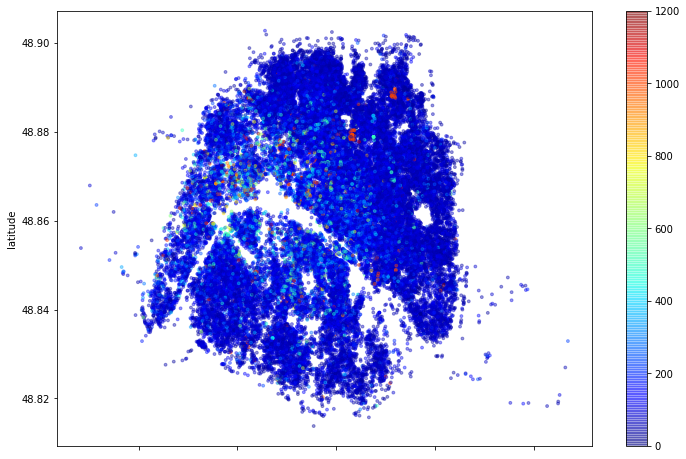

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

#### Quantidade de imóveis por bairro

In [0]:
# mostrar a quantidade de imóveis por bairro
df_clean.neighbourhood.value_counts().sort_values(ascending=False)

Buttes-Montmartre      6655
Popincourt             5841
Vaugirard              4279
Entrepôt               4154
Batignolles-Monceau    3908
Ménilmontant           3352
Buttes-Chaumont        3282
Opéra                  2884
Temple                 2854
Passy                  2645
Reuilly                2330
Bourse                 2100
Observatoire           2054
Panthéon               2030
Gobelins               1956
Hôtel-de-Ville         1801
Luxembourg             1734
Élysée                 1606
Palais-Bourbon         1576
Louvre                 1245
Name: neighbourhood, dtype: int64

Verificamos que os imóveis estão bem distribuidos entre os bairros, fazemos isso para verificar se nossa média de valor por bairro não esta enviesada por baixo número de dados.

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`
print("A média minima de noites para alugar é:\t {:.2f}".format(df_clean['minimum_nights'].mean()))

A média minima de noites para alugar é:	 3.60


## Conclusões


O estudo foi feito tendo como base um dataset resumido, portanto trata-se apenas de uma abordagem inicial.

No entanto é possível notar a presença de alguns *outliers* em algumas variáveis. Os imóveis estão bem distribuidos entre os bairros, o que faz com que os preços por bairros sejam menos inflacionados devido a baixa oferta.

Enfim, recomenda-se que seja utilizado para uma anlise mais detalhada o conjunto de dados completos.
